In [0]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

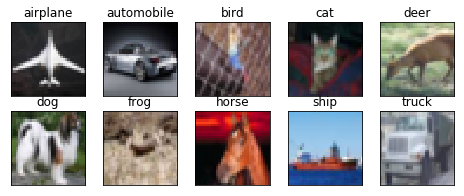

In [33]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [37]:
print(num_classes)

10


The sequential API allows you to create models layer-by-layer for most problems. It is limited in that it does not allow you to create models that share layers or have multiple inputs or outputs.

The functional API in Keras is an alternate way of creating models that offers a lot more flexibility, including creating more complex models.

**Keras Sequential Models**

This is a way of creating deep learning models where an instance of the Sequential class is created and model layers are created and added to it.

For example, the layers can be defined and passed to the Sequential as an array:

```
from keras.models import Sequential
from keras.layers import Dense
model = Sequential([Dense(2, input_dim=1), Dense(1)])
```

The Sequential model API is great for developing deep learning models in most situations, but it also has some limitations.

For example, it is not straightforward to define models that may have multiple different input sources, produce multiple output destinations or models that re-use layers.

**Keras Functional Models**

The Keras functional API provides a more flexible way for defining models.

It specifically allows you to define multiple input or output models as well as models that share layers. More than that, it allows you to define ad hoc acyclic network graphs.

Models are defined by creating instances of layers and connecting them directly to each other in pairs, then defining a Model that specifies the layers to act as the input and output to the model.

Source: https://machinelearningmastery.com/keras-functional-api-deep-learning/

In [38]:
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from keras.layers import Flatten
from keras.regularizers import l2

#******************* Using Functional API: acc-55% ******************************



# visible = Input(shape=(32, 32, 3))
# conv1 = Convolution2D(48, (3, 3), activation="relu", padding="same")(visible)
# conv1 = Dropout(0.25)(visible)

# conv2 = Convolution2D(48, (3, 3),  activation="relu", padding="same")(conv1) # 32conv2 = Dropout(0.25)

# pool1 = MaxPooling2D(pool_size=(2, 2))(conv2) # 15

# conv3 = Convolution2D(48, (1, 1), activation="relu", padding="same")(pool1) #16
# #conv3 = Dropout(0.25)(pool1)

# conv4 = Convolution2D(96, (3, 3), activation="relu",padding="same")(conv3) #16
# conv4 = Dropout(0.25)(conv3)

# conv5 = Convolution2D(192, (3, 3), activation="relu",padding="same")(conv4) #16

# pool2 = MaxPooling2D(pool_size=(2, 2))(conv5) #6

# conv7 = Convolution2D(96, (1, 1), activation="relu",padding="same")(pool2) #16

# conv8 = Convolution2D(96, (3, 3), activation="relu",padding="same")(conv7) #8
# conv8 = Dropout(0.25)(conv7)

# conv9 = Convolution2D(192, (3, 3),activation="relu", padding="same")(conv8) #8
# conv9 = Dropout(0.25)(conv8)

# flat = Flatten()(conv9)
# hidden1 = Dense(10, activation='relu')(flat)
# output = Dense(num_classes, activation='softmax')(hidden1)
# model = Model(inputs=visible, outputs=output)

# # Compile the model
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# #summarize layers
# print(model.summary())

# #plot graph
# plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

#*******************Using Functional API, acc - 50%******************************

# from keras.utils import plot_model
# from keras.models import Model
# from keras.layers import Input
# from keras.layers import Dense
# from keras.layers import Flatten
# from keras.layers.convolutional import Conv2D
# from keras.layers.pooling import MaxPooling2D

# visible = Input(shape=(32, 32, 3))
# conv1 = Convolution2D(48, (3, 3), activation="relu")(visible) #32
# conv1 = Dropout(0.25)(visible)

# conv2 = Conv2D(48, (3, 3),  activation="relu")(conv1) #30

# #pool1 = MaxPooling2D(pool_size=(2, 2))(conv2) # 15

# conv3 = Conv2D(96, (1, 1), activation="relu")(conv2) #15
# conv3 = Dropout(0.25)(conv2)

# conv4 = Conv2D(96, (3, 3), activation="relu")(conv3) #15
# conv4 = Dropout(0.25)(conv3)

# conv5 = Conv2D(96, (3, 3), activation="relu")(conv4) #13

# #pool2 = MaxPooling2D(pool_size=(2, 2))(conv5) #6

# conv7 = Conv2D(192, (1, 1), activation="relu")(conv5) #6
# conv7 = Dropout(0.25)(conv5)

# conv8 = Conv2D(192, (3, 3), activation="relu")(conv7) #6
# conv8 = Dropout(0.25)(conv7)


# flat = Flatten()(conv8)
# #hidden1 = Dense(num_classes, activation='relu')(flat)
# output = Dense(num_classes, activation='softmax')(flat)
# model = Model(inputs=visible, outputs=output)

# # Compile the model
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# #summarize layers
# print(model.summary())

# #plot graph
# plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

#******************* Using Functional API: acc-70% ******************************

# from keras.utils import plot_model
# from keras.models import Model
# from keras.layers import Input
# from keras.layers import Dense
# from keras.layers import Flatten
# from keras.layers.convolutional import Conv2D
# from keras.layers.pooling import MaxPooling2D
# from keras.regularizers import l2

# visible = Input(shape=(32, 32, 3))
# conv1 = Convolution2D(48, (3, 3), kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01),  activation="relu")(visible)
# # , kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01),  activation="relu", border_mode="same"
# # conv1 = BatchNormalization()(visible)
# # conv1 = Dropout(0.25)(visible)

# conv2 = Convolution2D(48, (3, 3), kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01), activation="relu")(conv1) # 32conv2 = Dropout(0.25)

# pool1 = MaxPooling2D(pool_size=(2, 2))(conv2) # 15

# conv3 = Convolution2D(96, (1, 1), kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01),activation="relu")(pool1) #16
# conv3 = BatchNormalization()(conv3)
# conv3 = Dropout(0.25)(conv3)

# conv4 = Convolution2D(96, (3, 3),kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01), activation="relu",border_mode="same")(conv3) #16
# conv4 = BatchNormalization()(conv4)
# conv4 = Dropout(0.25)(conv4)

# conv5 = Convolution2D(96, (3, 3), kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01),activation="relu")(conv4) #16

# pool2 = MaxPooling2D(pool_size=(2, 2))(conv5) #6

# conv7 = Convolution2D(192, (1, 1),kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01), activation="relu")(pool2) #16

# conv8 = Convolution2D(192, (3, 3), kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01),activation="relu",border_mode="same")(conv7) #8
# conv8 = BatchNormalization()(conv8)
# conv8 = Dropout(0.25)(conv8)

# conv9 = Convolution2D(192, (3, 3),kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01),activation="relu")(conv8) #8
# conv9 = BatchNormalization()(conv9)
# conv9 = Dropout(0.25)(conv9)

# flat = Flatten()(conv9)
# hidden1 = Dense(10, activation='relu')(flat)
# output = Dense(num_classes, activation='softmax')(hidden1)
# model = Model(inputs=visible, outputs=output)

# # Compile the model
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# #summarize layers
# print(model.summary())

# #plot graph
# plot_model(model, to_file='model_plot.jpg', show_shapes=True)

#******************* Using Functional API: acc-70% ******************************

# from keras.utils import plot_model
# from keras.models import Model
# from keras.layers import Input
# from keras.layers import Dense
# from keras.layers import Flatten
# from keras.layers.convolutional import Conv2D
# from keras.layers.pooling import MaxPooling2D
# from keras.regularizers import l2

# visible = Input(shape=(32, 32, 3))

# conv1 = Convolution2D(10, (3, 3),  activation="relu",)(visible) #30
# conv1 = BatchNormalization()(conv1)
# conv1 = Dropout(0.1)(conv1)

# conv2 = Convolution2D(16, (3, 3), activation="relu")(conv1) # 28
# conv2 = BatchNormalization()(conv2)
# conv2 = Dropout(0.1)(conv2)

# conv3 = Convolution2D(10, (1, 1), activation="relu")(conv2) #28

# pool1 = MaxPooling2D(pool_size=(2, 2))(conv3) # 15

# conv4 = Convolution2D(16, (3, 3), activation="relu")(pool1) #14
# conv4 = BatchNormalization()(conv4)
# conv4 = Dropout(0.1)(conv4)

# conv5 = Convolution2D(16, (3, 3), activation="relu")(conv4) #16
# conv5 = BatchNormalization()(conv5)
# conv5= Dropout(0.1)(conv5)

# conv6 = Convolution2D(16, (3, 3), activation="relu")(conv5) #16
# conv6 = BatchNormalization()(conv6)
# conv6 = Dropout(0.1)(conv6)

# conv7 = Convolution2D(16, (3, 3), activation="relu")(conv6) #16
# conv7 = BatchNormalization()(conv7)
# conv7= Dropout(0.1)(conv7)

# conv8 = Convolution2D(10, 4, 4)(conv7)

# flat = Flatten()(conv8)
# output = Dense(num_classes, activation='softmax')(flat)
# model = Model(inputs=visible, outputs=output)

# # Compile the model
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# #summarize layers
# print(model.summary())

# #plot graph
# plot_model(model, to_file='model_plot.jpg', show_shapes=True)

#******************* Using Functional API: acc-70% ******************************

# model = Sequential()
# model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
# model.add(Conv2D(32, (3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

# model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

# model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

# model.add(Flatten())
# model.add(Dense(512, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(num_classes, activation='softmax'))

# batch_size = 256
# epochs = 100
# model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
 
#******************* Using Functional API: acc-70% ******************************
  
# visible = Input(shape=(32,32,3))

# conv1 = Conv2D(32, kernel_size=3, activation='relu')(visible) #30
# pool1 = MaxPooling2D(pool_size=(2, 2))(conv1) # 15

# conv2 = Conv2D(32, kernel_size=3, activation='relu')(pool1) # 13
# #pool2 = MaxPooling2D(pool_size=(2, 2))(conv2) # 6

# conv3 = Conv2D(16, kernel_size=3, activation='relu')(conv2) #11
# pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

# conv4 = Conv2D(16, kernel_size=3, activation='relu')(pool3) #5
# #pool4 = MaxPooling2D(pool_size=(2, 2))(conv4) #1

# flat = Flatten()(conv4)
# hidden1 = Dense(10, activation='relu')(flat)
# output = Dense(num_classes, activation='sigmoid')(hidden1)
# model = Model(inputs=visible, outputs=output)

# model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
 
# # summarize layers
# print(model.summary())

#******************* Using Functional API: acc- 84.01% ******************************

# import keras
# from keras import regularizers
# from keras.optimizers import Adam

# #Define the model

# weight_decay = 1e-4
# opt_rms = keras.optimizers.rmsprop(lr=0.001,decay=1e-6)

# model = Sequential()

# model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay), input_shape=(32,32,3)))
# model.add(Activation('elu'))
# model.add(BatchNormalization())

# model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
# model.add(Activation('elu'))
# model.add(BatchNormalization())

# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(0.2))
 
# model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
# model.add(Activation('elu'))
# model.add(BatchNormalization())

# model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
# model.add(Activation('elu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(0.3))
 
# model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
# model.add(Activation('elu'))
# model.add(BatchNormalization())

# model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
# model.add(Activation('elu'))
# model.add(BatchNormalization())

# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(0.4))
 
# model.add(Flatten())
# model.add(Dense(num_classes, activation='softmax'))
 
# model.compile(loss='categorical_crossentropy', optimizer=opt_rms, metrics=['accuracy'])

# model.summary()

#******************* Trying to convert above via Functional API: acc- 75% ******************************

import keras
from keras import regularizers
from keras.optimizers import Adam
from keras.layers import Input

#Define the model

opt_rms = keras.optimizers.rmsprop(lr=0.001,decay=1e-6)

visible = Input(shape=(32, 32, 3))

conv1  = Conv2D(10, (3,3), padding='same',  input_shape=(32,32,3))(visible) #32
conv1 = Activation('relu')(conv1)
conv1 = BatchNormalization()(conv1)
conv1 = Dropout(0.1)(conv1)

conv2  = Conv2D(16, (3,3), padding='same')(conv1) #32
conv2  = Activation('relu')(conv2)
conv2  = BatchNormalization()(conv2)

pool1 = MaxPooling2D(pool_size=(2,2))(conv2) #16
pool1 = Dropout(0.1)(pool1)

conv3 = Convolution2D(10, (1, 1), activation="relu")(pool1) #16

conv4 = Conv2D(16, (3,3), padding='same')(conv3) #16
conv4 = Activation('relu')(conv4)
conv4 = BatchNormalization()(conv4)
conv4 = Dropout(0.1)(conv4)

conv5 = Conv2D(16, (3,3), padding='same')(conv4) #16
conv5 = Activation('relu')(conv4)
conv5 = BatchNormalization()(conv4)

pool2 = MaxPooling2D(pool_size=(2,2))(conv5) #8
pool2 = Dropout(0.1)(pool2)
 
conv6 = Convolution2D(10, (1, 1), activation="relu")(pool2) #8
  
conv7 = Conv2D(16, (3,3), padding='same')(conv6) #8
conv7 = Activation('relu')(conv7)
conv7 = BatchNormalization()(conv7)
conv7 = Dropout(0.1)(conv7)

conv8 = Conv2D(16, (3,3), padding='same')(conv7) #8
conv8 = Activation('relu')(conv8)
conv8 = BatchNormalization()(conv8)

conv9 = Conv2D(10, (8,8))(conv8) #1
 
flat = Flatten()(conv9)
output = Activation('softmax')(flat)
model = Model(inputs=visible, outputs=output)
 
model.compile(loss='categorical_crossentropy', optimizer=opt_rms, metrics=['accuracy'])

#summarize layers
print(model.summary())

#plot graph
plot_model(model, to_file='model_plot.jpg', show_shapes=True)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 32, 32, 10)        280       
_________________________________________________________________
activation_22 (Activation)   (None, 32, 32, 10)        0         
_________________________________________________________________
batch_normalization_19 (Batc (None, 32, 32, 10)        40        
_________________________________________________________________
dropout_17 (Dropout)         (None, 32, 32, 10)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 32, 32, 16)        1456      
_________________________________________________________________
activation_23 (Activation)   (None, 32, 32, 16)        0         
__________

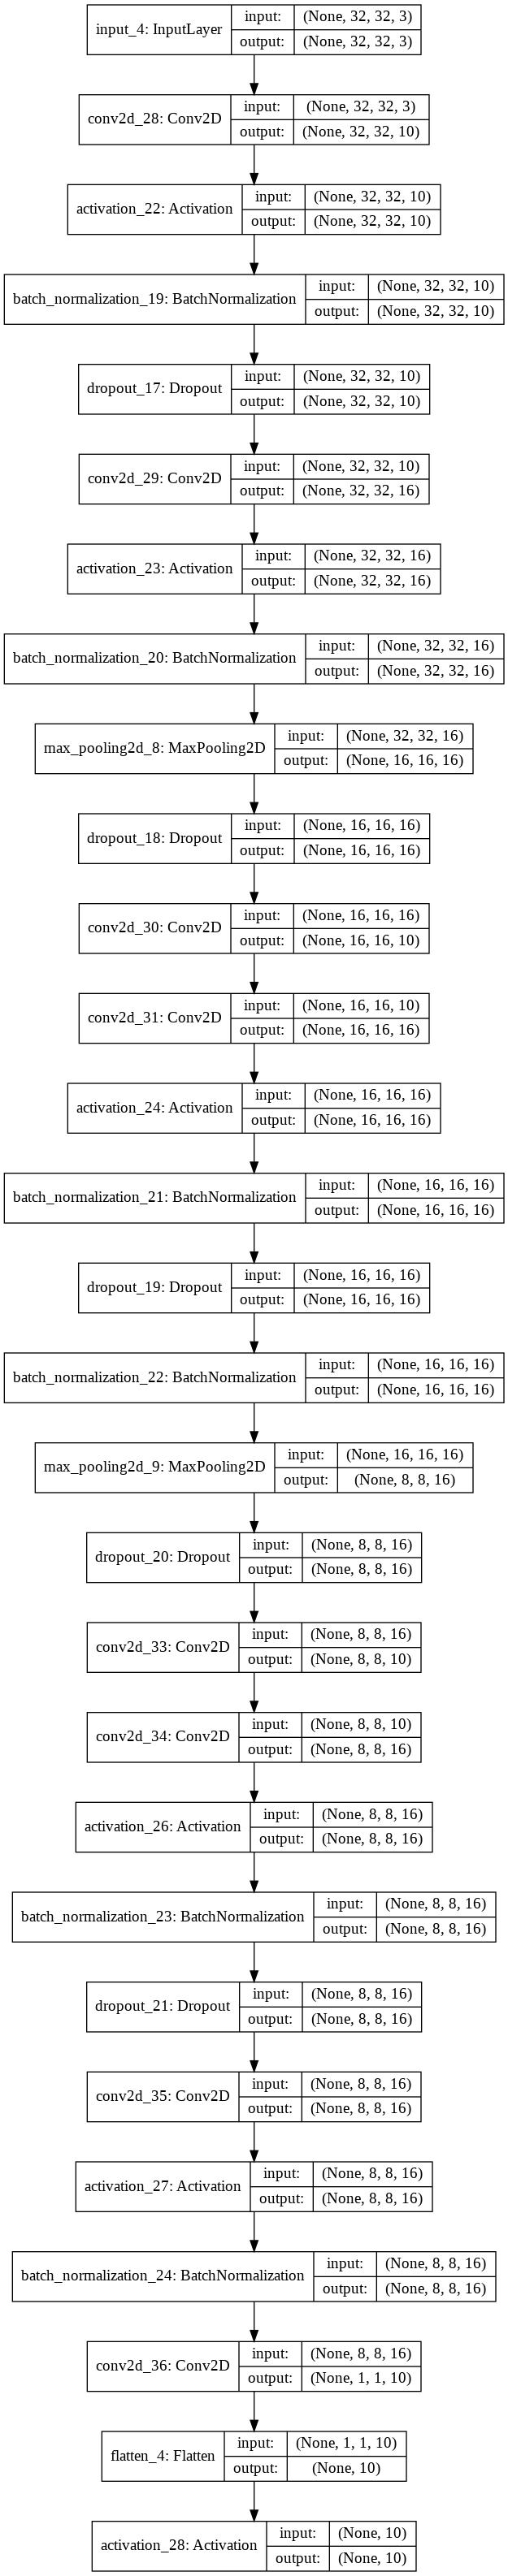

In [39]:
from IPython.display import Image, display
display(Image('model_plot.jpg'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, callbacks=[<keras.ca..., steps_per_epoch=390, epochs=75)`


Epoch 1/75

Epoch 00001: LearningRateScheduler setting learning rate to 0.001.
390/390 [==============================] - 7s 18ms/step - loss: 1.6612 - acc: 0.4017 - val_loss: 1.5155 - val_acc: 0.4621

Epoch 00001: val_acc improved from -inf to 0.46210, saving model to model_accuracy.best.hdf5
Epoch 2/75

Epoch 00002: LearningRateScheduler setting learning rate to 0.001.
390/390 [==============================] - 6s 14ms/step - loss: 1.3280 - acc: 0.5215 - val_loss: 1.3550 - val_acc: 0.5234

Epoch 00002: val_acc improved from 0.46210 to 0.52340, saving model to model_accuracy.best.hdf5
Epoch 3/75

Epoch 00003: LearningRateScheduler setting learning rate to 0.001.
390/390 [==============================] - 6s 14ms/step - loss: 1.1930 - acc: 0.5733 - val_loss: 1.2001 - val_acc: 0.5698

Epoch 00003: val_acc improved from 0.52340 to 0.56980, saving model to model_accuracy.best.hdf5
Epoch 4/75

Epoch 00004: LearningRateScheduler setting learning rate to 0.001.
390/390 [=====================

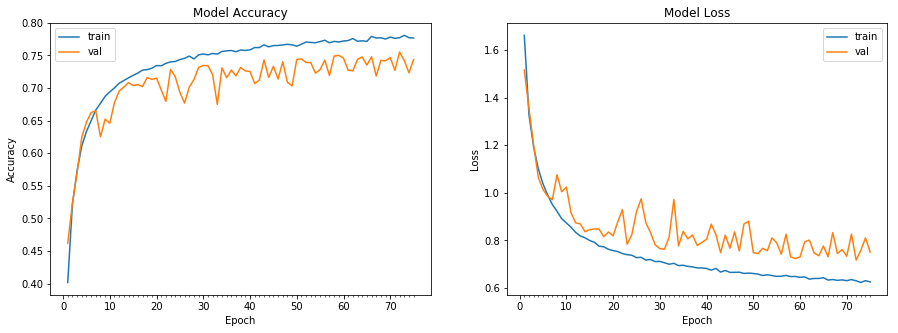

Accuracy on test data is: 74.36


In [40]:
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler
from keras.callbacks import ModelCheckpoint

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)

# Accuracy on test data is: 83.88
# def scheduler(epoch, lr):
#   return round(0.003 * 1/(1 + 0.319 * epoch), 10)

# Accuracy on test data is: 83.48
def lr_schedule(epoch):
    lrate = 0.001
    if epoch > 75:
        lrate = 0.0005
    if epoch > 100:
        lrate = 0.0003
    return lrate

filepath="model_accuracy.best.hdf5"

reduce_LR = LearningRateScheduler(lr_schedule, verbose=1)
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 75, 
                                 validation_data = (test_features, test_labels), verbose=1,
                                callbacks=[reduce_LR, checkpoint])
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

Problems

https://stackoverflow.com/questions/35540269/keras-giving-same-loss-on-every-epoch

https://stackoverflow.com/questions/51792108/keras-must-compile-model-before-using-it-despite-compile-is-used

https://stackoverflow.com/questions/52721018/keras-fit-generator-raise-you-must-compile-your-model-before-using-it-error